# МДТТ, Лабораторная работа №1

---
Вариант №2

Выполнил: студент группы М8О-103М-20 Воробьев А.В.

---
0. Импортируем необходимые библиотеки:

In [233]:
import math
import numpy as np
import matplotlib.pyplot as plt

---
### 1. Исходные данные:

---
#### 1.1. Геометрические параметры панели:

In [234]:
a = 1
b = 1
psi = a/b
print(f'psi = {psi}')

psi = 1.0


---
#### 1.2. Коэффициент Пуассона:

In [235]:
mu = 0.2

---
#### 1.3. Кривизна панели:

In [236]:
k = kx = ky = 10

---
#### 1.4. Вычислим коэффициент "c":

In [237]:
c = 384 * (1 + mu) * (k**2 / math.pi**6)
print(f'c = {c}')

c = 47.93064068947288


---
### 2. Создадим необходимые функции:

---
#### 2.1. Функция нахождения S1:

In [238]:
def def_s1(s1_alpha):
    i = 1
    j = 1
    sum_s1 = 0
    for l in range(0, 8):
        ret_s1 = 1 / ((j**2) * ((i**2 + j**2)**2) * (((math.pi**2) * (i**2 + j**2) + s1_alpha)**2))
        sum_s1 += ret_s1
        i += 1
        j += 1
    return sum_s1

---
#### 2.2. Функция нахождения S2:

In [239]:
def def_s2(s2_alpha):
    i = 1
    j = 1
    sum_s2 = 0
    for l in range(0, 8):
        ret_s2 = 1 / ((i**2) * (j**2) * (i**2 + j**2) * ((math.pi**2) * (i**2 + j**2) + s2_alpha))
        sum_s2 += ret_s2
        i += 1
        j += 1
    return sum_s2

---
#### 2.3. Функция нахождения q:

Корень 1:

In [240]:
def def_qp(qp_alpha, qp_s1, qp_s2):
    ret_qp = ((qp_s2 + (qp_s2**2 + (1/c) * qp_s1 * qp_alpha)**0.5) / qp_s1) - 2 * qp_alpha
    return ret_qp

Корень 2:

In [241]:
def def_qm(qm_alpha, qm_s1, qm_s2):
    ret_qm = ((qm_s2 - (qm_s2**2 + (1/c) * qm_s1 * qm_alpha)**0.5) / qm_s1) - 2 * qm_alpha
    return ret_qm

---
### 3. Теперь посчитаем значения S1, S2 и q:

---
#### 3.1. Зададим диапазон значения для $\alpha$ и для корней $q_1$ и $q_2$: 

In [242]:
alpha = np.arange(-70, 0, 0.001)
q1 = np.zeros(len(alpha))
q2 = np.zeros(len(alpha))

---
#### 3.2. Вычислим $S_1$, $S_2$, $q_1$ и $q_2$:

In [243]:
for i in range(len(alpha)):
    a = alpha[i]
    
    s1 = def_s1(a)
    s2 = def_s2(a)
    
    q1[i] = def_qp(a, s1, s2)
    q2[i] = def_qm(a, s1, s2)

<ipython-input-240-997da5691d31>:2: RuntimeWarning: invalid value encountered in double_scalars
  ret_qp = ((qp_s2 + (qp_s2**2 + (1/c) * qp_s1 * qp_alpha)**0.5) / qp_s1) - 2 * qp_alpha


---
#### 3.3. Выведем значения корней $q_1$ и $q_2$:

In [246]:
np.set_printoptions(linewidth = 75, precision=2, threshold=1000)
print(f'Массив первого корня q:\n{q1}')
print(f'Массив второго корня q:\n{q2}')

Массив первого корня q:
[  nan   nan   nan ... 79.19 79.2  79.2 ]
Массив второго корня q:
[ nan  nan  nan ... 0.01 0.   0.  ]


---
### 4. Построим график функции $\alpha(q)$

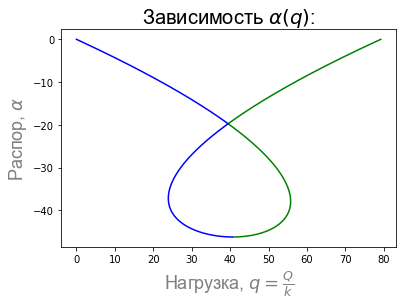

In [247]:
plt.plot(q1, alpha, 'g', q2, alpha, 'b')
plt.title(r'Зависимость $\alpha(q)$:', fontsize=20, fontname='Arial')
plt.xlabel(r'Нагрузка, $q=\frac{Q}{k}$', fontsize=18, color='gray', fontname='Arial')
plt.ylabel(r'Распор, $\alpha$', fontsize=18, color='gray', fontname='Arial')
plt.show()

---
